# 1. Calculating just sigmoid output

In [69]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

In [60]:
N = 40
D = 2

# sampling data from standard normal distribution
X = np.random.normal(loc=2, scale=2, size=(N, D))

print("X: \n", X)

X: 
 [[ 0.20532278 -0.64767434]
 [ 2.76842735 -2.00844995]
 [-1.18250723  2.83168028]
 [ 0.80832092  3.26868615]
 [ 3.15588573  2.11542426]
 [ 4.58465056  2.96375368]
 [ 4.19733759  0.86298356]
 [ 3.42466183  1.9951582 ]
 [ 2.01091025 -2.18005277]
 [ 3.32130804  3.45659666]
 [ 4.6953939  -2.36260996]
 [ 0.20525824 -0.55729602]
 [ 2.11946978  1.34844921]
 [ 2.00159632  1.09820659]
 [ 4.40201927 -0.54539832]
 [ 2.18670292  4.40019708]
 [ 3.24181649  2.60734954]
 [ 5.55408705  3.99660048]
 [ 0.99324551  4.57811408]
 [ 4.16992817  1.75695359]
 [ 2.34290842  1.90724723]
 [ 2.39488172  1.31059348]
 [ 2.21774508  3.28398735]
 [-1.55099564 -1.84432314]
 [ 1.62498816  4.19524906]
 [ 2.92178528  3.92588406]
 [ 5.08321253 -1.15143404]
 [ 3.12114519  0.16671228]
 [ 0.8084847   0.9132498 ]
 [ 6.74607486  2.7934931 ]
 [ 4.72520552  1.98222107]
 [ 0.8185099   5.49268911]
 [-1.0583952   1.04057094]
 [-0.18399958  2.32238173]
 [ 2.84747306 -0.23467103]
 [ 0.52565491  2.73341631]
 [ 1.05653815  2.573303

In [22]:
# Adding the bias
ones = np.ones((N, 1))

# concatenating the bias 
X_b = np.hstack((ones, X))

# random weights 
w = np.random.randn(D+1)

# output 
z = X_b.dot(w)

# calculating sigmoid 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

print("Sigmoid z: \n", sigmoid(z))

Sigmoid z: 
 [0.96116168 0.01511071 0.14578868 0.04532634 0.88475327 0.96767261
 0.00526324 0.00428161 0.00022851 0.04974766 0.12371015 0.00367949
 0.88888788 0.97689937 0.00815723 0.79442034 0.11044315 0.66187329
 0.26956928 0.0000003  0.2459833  0.00070337 0.00008715 0.00276152
 0.80758855 0.92790028 0.01224603 0.00563386 0.0000001  0.00001367
 0.02440459 0.59386289 0.02291128 0.00104914 0.97108536 0.00311449
 0.00060478 0.27447031 0.01498507 0.76437845]


In [23]:
# All the values above are less than 1

# 2. Calculating cross entropy

In [61]:
N = 100
D = 2

# sample from std. normal disb. 
X = np.random.randn(N, D)

# center the first 50 points around (-2, -2)
X[:50, :] = X[:50, :] - 2*np.ones((50, D))

# center the last 50 points around (2, 2)
X[50:, :] = X[50:, :] + 2*np.ones((50, D))

# making the y_true - first 50 points to be 0 and last 50 to be 1
y_true = np.array([0]*50 + [1]*50)

# adding the bias term
X_b = np.hstack((np.ones((N, 1)), X))

# random weights
w = np.random.randn(D+1)
# w = np.random.randn(D+1) / np.sqrt(D)

# Calculating the model output
z = X_b.dot(w)

# define sigmoid 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# calculating th predicted values
y_hat = sigmoid(z)

In [62]:
# calculating the cross entropy error 
def cross_entropy(y_true, y_hat):
    E = 0
    for i in range(len(y_true)):
        if y_true[i] == 1:
            E = E - np.log(y_hat[i])
        elif y_true[i] == 0:
            E -= np.log(1 - y_hat[i])
    return E

In [63]:
print("Error with random weights: ", cross_entropy(y_true, y_hat))

Error with random weights:  7.240260284028676


In [64]:
# Calculating with the closed form solution
w = np.array([0, 4, 4])
z = X_b.dot(w)
y_hat = sigmoid(z)

print("Error with closed form solution: ", cross_entropy(y_true, y_hat))

Error with closed form solution:  0.025515605708444716


In [44]:
# It seems the closed form solution performs better as we already know it

# 3. Learning the optimal weights using Gradient Descent

In [81]:
N = 100
D = 2

N_per_class = N//2
# N_per_class = np.floor(N/2)

X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:N_per_class,:] = X[:N_per_class,:] - 2*np.ones((N_per_class,D))

# center the last 50 points at (2, 2)
X[N_per_class:,:] = X[N_per_class:,:] + 2*np.ones((N_per_class,D))

# labels: first N_per_class are 0, last N_per_class are 1
T = np.array([0]*N_per_class + [1]*N_per_class)

# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

In [82]:
# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            # if true label is 1, then (y_true)*log(y_hat)
            E -= np.log(Y[i])
        else:
            # if true label is 0, then (1 - y_true)*log(1 - y_hat)
            E -= np.log(1 - Y[i])
    return E


In [83]:
# NOTE: we can't solve for the optimal weights by taking derivative of cross entropy error and equating it to zero.
# so, we use gradient descent to solve for it

# We do dellJ / dellW which finally comes to => (y - t)*x

In [84]:
# let's do gradient descent 100 times
learning_rate = 0.1
for i in range(100):
    if i % 10 == 0:
        print(cross_entropy(T, Y))

    # gradient descent weight udpate
    w -= learning_rate * Xb.T.dot(Y-T)

    # recalculate Y
    Y = sigmoid(Xb.dot(w))


print("Final w:", w)

199.7839033116856
3.960638049304706e-06
3.960616383549689e-06
3.960594717905697e-06
3.960573052594773e-06
3.9605513875058944e-06
3.960529722750085e-06
3.960508058105299e-06
3.960486393460514e-06
3.960464729481865e-06
Final w: [ 0.23210267 16.24260708 16.59463504]


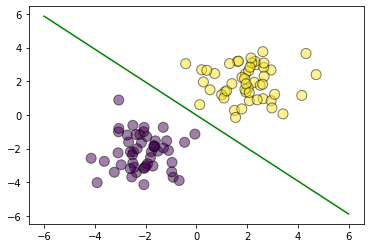

In [85]:
# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5, edgecolor="black")
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis, c="green")
plt.show()